In [1]:
psnr = [18.680141, 14.5373, 16.678677, 16.937946, 18.557934, 14.577075, 17.545328, 18.21395, 18.189692, 18.35741]
ssim = [0.47412324, 0.47946468, 0.50667745, 0.5182882, 0.40986508, 0.4980549, 0.63974226, 0.63125074, 0.5714904, 0.4930398]
psnr_fine = [18.790533, 14.478284, 16.743114, 16.868551, 18.565668, 14.662598, 17.602137, 18.225819, 18.223934, 18.400364]
ssim_fine = [0.47979182, 0.48036927, 0.50494874, 0.5174515, 0.4187762, 0.49905854, 0.6366769, 0.62079793, 0.57648945, 0.49423438]
miou = [0.52838165, 0.42462546, 0.36073428, 0.31907237, 0.3830865, 0.2829054, 0.51568216, 0.4454773, 0.5013875, 0.29229742]

print("psnr: ", sum(psnr)/len(psnr))
print("ssim: ", sum(ssim)/len(ssim))
print("psnr_fine: ", sum(psnr_fine)/len(psnr_fine))
print("ssim_fine: ", sum(ssim_fine)/len(ssim_fine))
print("miou: ", sum(miou)/len(miou))

psnr:  17.227545300000003
ssim:  0.5221996750000001
psnr_fine:  17.2561002
ssim_fine:  0.5228594729999999
miou:  0.405365004


In [1]:
from data.klevr import KlevrDataset
from data.scannet import RendererDataset
import numpy as np
import torch
import time

begin1 = time.time()
scannet_dataset = RendererDataset(
    root_dir="/home/timothy/Desktop/2023Spring/Semantic-Ray/data/scannet",
    is_train=True
)
print("scannet time: ", time.time() - begin1)
begin11 = time.time()
scannet_data = scannet_dataset[0]
print("scannet time: ", time.time() - begin11)
begin12 = time.time()
scannet_data1 = scannet_dataset[1]
print("scannet time: ", time.time() - begin12)

'''
validation dataset need to be modified
'''
begin1 = time.time()
val_scenes = np.loadtxt("configs/lists/scannetv2_val_split.txt", dtype=str).tolist()
for name in val_scenes:
    val_cfg = {'val_database_name': name}
    val_set = RendererDataset(cfg=val_cfg, is_train=False, root_dir="/home/timothy/Desktop/2023Spring/Semantic-Ray/data/scannet")
    break
print("scannet_val time: ", time.time() - begin1)
begin11 = time.time()
val_scannet_data = val_set[0]
print("scannet_val time: ", time.time() - begin11)
begin12 = time.time()
val_scannet_data1 = val_set[1]
print("scannet_val time: ", time.time() - begin12)

begin2 = time.time()
dataset = KlevrDataset(
    root_dir="/home/timothy/Desktop/2023Spring/GeoNeRF/data/data/nesf_data/klevr/",
    split="val",
    nb_views=6,
    get_semantic=True,
)
print("klevr time: ", time.time() - begin2)
begin22 = time.time()
data = dataset[0]
print("klevr time: ", time.time() - begin22)


scannet time:  0.00035071372985839844
scannet time:  1.4460539817810059
scannet time:  1.8903958797454834
train_ids:
 ['0', '5', '10', '15', '20', '25', '30', '35', '40', '45', '50', '55', '60', '65', '70', '75', '80', '85', '90', '95', '100', '105', '110', '115', '120', '125', '130', '135', '140', '145', '150', '155', '160', '165', '170', '175', '180', '185', '190', '195', '200', '205', '210', '215', '220', '225', '230', '235', '240', '245', '250', '255', '260', '265', '270', '275', '280', '285', '290', '295', '300', '305', '310', '315', '320', '325', '330', '335', '340', '345', '350', '355', '360', '365', '370', '375', '380', '385', '390', '395', '400', '405', '410', '415', '420', '425', '430', '435', '440', '445', '450', '455', '460', '465', '470', '475', '480', '485', '490', '495', '500', '505', '510', '515', '520', '525', '530', '535', '540', '545', '550', '555', '560', '565', '570', '575', '580', '585', '590', '595', '600', '605', '610', '615', '620', '625', '630', '635', '640', 

In [2]:
print(sorted(data.keys()))
print(sorted(val_scannet_data.keys()))
print(sorted(scannet_data.keys()))

['affine_mats', 'affine_mats_inv', 'c2ws', 'closest_idxs', 'depths', 'depths_aug', 'depths_h', 'images', 'intrinsics', 'near_fars', 'semantics', 'w2cs']
['affine_mats', 'affine_mats_inv', 'c2ws', 'closest_idxs', 'depths', 'depths_aug', 'depths_h', 'images', 'intrinsics', 'near_fars', 'semantics', 'w2cs']
['affine_mats', 'affine_mats_inv', 'c2ws', 'closest_idxs', 'depths', 'depths_aug', 'depths_h', 'images', 'intrinsics', 'near_fars', 'semantics', 'w2cs']


In [3]:
for k, v in data.items():
    if isinstance(v, torch.Tensor):
        print(k, 'tensor', v.shape)
    elif isinstance(v, np.ndarray):
        print(k, 'nparray', v.shape)
    elif isinstance(v, dict):
        print(k, 'dict')
        for k1, v1 in v.items():
            print(k1, v1.shape)
    else:
        print(k, type(v))


images nparray (7, 3, 256, 256)
semantics nparray (7, 256, 256)
w2cs nparray (7, 4, 4)
c2ws nparray (7, 4, 4)
intrinsics nparray (7, 3, 3)
affine_mats nparray (7, 4, 4, 3)
affine_mats_inv nparray (7, 4, 4, 3)
closest_idxs nparray (6, 5)
depths_aug nparray (7, 64, 64)
depths_h nparray (7, 256, 256)
depths dict
level_0 (7, 256, 256)
level_1 (7, 128, 128)
level_2 (7, 64, 64)
near_fars nparray (7, 2)


In [4]:
import numpy as np
for k, v in scannet_data.items():
    if isinstance(v, torch.Tensor):
        print(k, 'tensor', v.shape)
    elif isinstance(v, np.ndarray):
        print(k, 'nparray', v.shape)
    elif isinstance(v, dict):
        print(k, 'dict')
        for k1, v1 in v.items():
            print(k1, v1.shape)
    else:
        print(k, type(v))

images tensor torch.Size([9, 3, 240, 320])
semantics tensor torch.Size([9, 240, 320])
w2cs tensor torch.Size([9, 4, 4])
intrinsics tensor torch.Size([9, 3, 3])
near_fars tensor torch.Size([9, 2])
depths_h tensor torch.Size([9, 240, 320])
closest_idxs tensor torch.Size([8, 4])
c2ws tensor torch.Size([9, 4, 4])
affine_mats nparray (9, 4, 4, 3)
affine_mats_inv nparray (9, 4, 4, 3)
depths_aug nparray (9, 60, 80)
depths dict
level_0 (9, 240, 320)
level_1 (9, 120, 160)
level_2 (9, 60, 80)


In [5]:
import numpy as np
for k, v in val_scannet_data.items():
    if isinstance(v, torch.Tensor):
        print(k, 'tensor', v.shape)
    elif isinstance(v, np.ndarray):
        print(k, 'nparray', v.shape)
    elif isinstance(v, dict):
        print(k, 'dict')
        for k1, v1 in v.items():
            print(k1, v1.shape)
    else:
        print(k, type(v))

images tensor torch.Size([9, 3, 240, 320])
semantics tensor torch.Size([9, 240, 320])
w2cs tensor torch.Size([9, 4, 4])
intrinsics tensor torch.Size([9, 3, 3])
near_fars tensor torch.Size([9, 2])
depths_h tensor torch.Size([9, 240, 320])
closest_idxs tensor torch.Size([8, 4])
c2ws tensor torch.Size([9, 4, 4])
affine_mats nparray (9, 4, 4, 3)
affine_mats_inv nparray (9, 4, 4, 3)
depths_aug nparray (9, 60, 80)
depths dict
level_0 (9, 240, 320)
level_1 (9, 120, 160)
level_2 (9, 60, 80)


In [6]:
print(data['semantics'].min(), data['semantics'].max())
print(scannet_data['semantics'].min(), scannet_data['semantics'].max())
print(val_scannet_data['semantics'].min(), val_scannet_data['semantics'].max())

╭─────────────────────────────── Traceback (most recent call last) ────────────────────────────────╮
│ in <module>:1                                                                                    │
│                                                                                                  │
│ ❱ 1 print(data['semantic'].min(), data['semantic'].max())                                        │
│   2 print(scannet_data['semantic'].min(), scannet_data['semantic'].max())                        │
│   3 print(val_scannet_data['semantic'].min(), val_scannet_data['semantic'].max())                │
│   4                                                                                              │
╰──────────────────────────────────────────────────────────────────────────────────────────────────╯
KeyError: 'semantic'

In [ ]:
print(data["depths"]["level_0"].shape)
print(data["depths"]["level_1"].shape)
print(data["depths"]["level_2"].shape)
print(data["depths_aug"].shape)
print(data["depths_h"].shape)
print(data["near_fars"])
print(data["intrinsics"].shape)
print(data["w2cs"].shape)
print(type(data["depths_h"]))

In [ ]:
import numpy as np
source_depths = data["depths_h"][:6]
target_depths = data["depths_h"][6:]
points = []
H, W = 256, 256

ys, xs = torch.meshgrid(
    torch.linspace(0, H - 1, H), torch.linspace(0, W - 1, W), indexing="ij"
)  # pytorch's meshgrid has indexing='ij'
for num in range(source_depths.shape[0]):
    mask = source_depths[num] > 0
    # print(mask.shape)
    ys, xs = ys.reshape(-1), xs.reshape(-1)

    dirs = torch.stack(
    [
        (xs - data["intrinsics"][num][0, 2]) / data["intrinsics"][num][0, 0],
        (ys - data["intrinsics"][num][1, 2]) / data["intrinsics"][num][1, 1],
        torch.ones_like(xs),
    ],
    -1,
    )
    rays_dir = (
        dirs @ torch.asarray(data["c2ws"][num][:3, :3]).t()
    )
    rays_orig = torch.asarray(data["c2ws"][num][:3, -1]).clone().reshape(1, 3).expand(rays_dir.shape[0], -1)
    rays_orig = rays_orig.reshape(H,W,-1)[mask]
    rays_depth = torch.asarray(source_depths[num]).reshape(H,W,-1)[mask]
    rays_dir = rays_dir.reshape(H,W,-1)[mask]
    print(rays_orig.shape)
    print(rays_dir.shape)
    print(rays_depth.shape)
    ray_pts = rays_orig + rays_depth * rays_dir
    points.append(ray_pts.reshape(-1,3))

points = torch.cat(points,0).reshape(-1,3)
print(points.shape)



In [ ]:
# From Github https://github.com/balcilar/DenseDepthMap
def dense_map(Pts, n, m, grid):
    ng = 2 * grid + 1
    
    mX = torch.zeros((m,n)) + torch.tensor(100000).to(torch.float32)
    mY = torch.zeros((m,n)) + torch.tensor(100000).to(torch.float32)
    mD = torch.zeros((m,n))
    y_ = Pts[1].to(torch.int32)
    x_ = Pts[0].to(torch.int32)
    mX[y_,x_] = Pts[0] - torch.round(Pts[0])
    mY[y_,x_] = Pts[1] - torch.round(Pts[1])
    mD[y_,x_] = Pts[2]
    
    KmX = torch.zeros((ng, ng, m - ng, n - ng))
    KmY = torch.zeros((ng, ng, m - ng, n - ng))
    KmD = torch.zeros((ng, ng, m - ng, n - ng))
    
    for i in range(ng):
        for j in range(ng):
            KmX[i,j] = mX[i : (m - ng + i), j : (n - ng + j)] - grid - 1 +i
            KmY[i,j] = mY[i : (m - ng + i), j : (n - ng + j)] - grid - 1 +i
            KmD[i,j] = mD[i : (m - ng + i), j : (n - ng + j)]
    S = torch.zeros_like(KmD[0,0])
    Y = torch.zeros_like(KmD[0,0])
    
    for i in range(ng):
        for j in range(ng):
            s = 1/torch.sqrt(KmX[i,j] * KmX[i,j] + KmY[i,j] * KmY[i,j])
            Y = Y + s * KmD[i,j]
            S = S + s
    
    S[S == 0] = 1
    out = torch.zeros((m,n))
    out[grid + 1 : -grid, grid + 1 : -grid] = Y/S
    return out

In [ ]:
class Calibration:
    def __init__(self, calib_filepath):
        calibs = self.read_calib_file(calib_filepath)

        self.P = calibs['P2']
        self.P = np.reshape(self.P, [3,4])

        self.W2C = calibs['Tr_velo_to_cam']
        self.W2C = np.reshape(self.W2C, [3,4])

        self.R0 = calibs['R0_rect']
        self.R0 = np.reshape(self.R0,[3,3])

    @staticmethod
    def read_calib_file(filepath):
        data = {}
        with open(filepath, 'r') as f:
            for line in f.readlines():
                line = line.rstrip()
                if len(line)==0: continue
                key, value = line.split(':', 1)
                try:
                    data[key] = np.array([float(x) for x in value.split()])
                except ValueError:
                    pass
        return data
    
    # From LiDAR coordinate system to Camera Coordinate system
    def lidar2cam(self, pts_3d_lidar):
        n = pts_3d_lidar.shape[0]
        pts_3d_hom = np.hstack((pts_3d_lidar, np.ones((n,1))))
        pts_3d_cam_ref = np.dot(pts_3d_hom, np.transpose(self.W2C))
        # pts_3d_cam_rec = np.transpose(np.dot(self.R0, np.transpose(pts_3d_cam_ref)))
        return pts_3d_cam_ref
    
    # From Camera Coordinate system to Image frame
    def rect2Img(self, rect_pts, img_width, img_height):
        n = rect_pts.shape[0]
        points_hom = np.hstack((rect_pts, np.ones((n,1))))
        points_2d = np.dot(points_hom, np.transpose(self.P)) # nx3
        points_2d[:,0] /= points_2d[:,2]
        points_2d[:,1] /= points_2d[:,2]
        
        mask = (points_2d[:,0] >= 0) & (points_2d[:,0] <= img_width) & (points_2d[:,1] >= 0) & (points_2d[:,1] <= img_height)
        mask = mask & (rect_pts[:,2] > 2)
        return points_2d[mask,0:2], mask


In [ ]:
w2c_ref = torch.asarray(data["w2cs"][6])
intrinsics_ref = torch.asarray(data["intrinsics"][6])
img_width = 256
img_height = 256

R = w2c_ref[:3, :3]  # (3, 3)
T = w2c_ref[:3, 3:]  # (3, 1)
ray_pts = torch.matmul(points, R.t()) + T.reshape(1, 3)

ray_pts_ndc = ray_pts @ intrinsics_ref.t()
ray_pts_ndc[:, 0] /= ray_pts_ndc[:, 2]
ray_pts_ndc[:, 1] /= ray_pts_ndc[:, 2]
mask = (ray_pts_ndc[:, 0] >= 0) & (ray_pts_ndc[:, 0] <= img_width) & (ray_pts_ndc[:, 1] >= 0) & (ray_pts_ndc[:, 1] <= img_height)
mask = mask & (ray_pts[:, 2] > 2)
points_2d = ray_pts_ndc[mask, 0:2]

In [ ]:
lidarOnImage = torch.cat((points_2d, ray_pts[mask,2].reshape(-1,1)), 1)

out = dense_map(lidarOnImage.T, 256, 256, 1)

In [ ]:
print(out.shape)
print(out[125:130,125:130])

In [ ]:
print(points.shape)

In [ ]:
import pytorch3d
print(pytorch3d.__version__)

In [ ]:
import torch.nn as nn
from pytorch3d.renderer import (
    FoVPerspectiveCameras, look_at_view_transform,
    RasterizationSettings, BlendParams,
    MeshRenderer, MeshRasterizer, HardPhongShader, PointsRasterizationSettings, PointsRasterizer
)
point_cloud = pytorch3d.structures.pointclouds.Pointclouds(points.unsqueeze(0))
class PointsRenderer(nn.Module):
    def __init__(self, rasterizer, compositor) -> None:
        super().__init__()
        self.rasterizer = rasterizer
        self.compositor = compositor

    def forward(self, point_clouds, **kwargs) -> torch.Tensor:
        fragments = self.rasterizer(point_clouds, **kwargs)

        r = self.rasterizer.raster_settings.radius

        dists2 = fragments.dists.permute(0, 3, 1, 2)
        weights = 1 - dists2 / (r * r)
        images = self.compositor(
            fragments.idx.long().permute(0, 3, 1, 2),
            weights,
            point_clouds.features_packed().permute(1, 0),
            **kwargs,
        )

        # permute so image comes at the end
        images = images.permute(0, 2, 3, 1)

        return images, fragments.zbuf
    
device = torch.device("cuda")
R = torch.asarray(data["c2ws"][6:,:3,:3]).to("cuda")
T = torch.asarray(data["c2ws"][6:,:3,-1]).to("cuda")
camera = FoVPerspectiveCameras(device=device, R=R, T=T)

raster_settings = PointsRasterizationSettings(
        image_size=(256, 256),
        radius=0.007,
        points_per_pixel=15,
    )

rasterizer = PointsRasterizer(
    cameras=camera, 
    raster_settings=raster_settings
)
renderer = PointsRenderer(rasterizer=rasterizer, compositor=pytorch3d.renderer.points.compositor.AlphaCompositor())
print(point_cloud.features_packed())
images, fragments = renderer(point_cloud)

In [ ]:
cameras = # camera object derived from CamerasBase
xyz = # 3D points of shape (batch_size, num_points, 3)
# transform xyz to the camera view coordinates
xyz_cam = cameras.get_world_to_view_transform().transform_points(xyz)
# extract the depth of each point as the 3rd coord of xyz_cam
depth = xyz_cam[:, :, 2:]
# project the points xyz to the camera
xy = cameras.transform_points(xyz)[:, :, :2]
# append depth to xy
xy_depth = torch.cat((xy, depth), dim=2)
# unproject to the world coordinates
xyz_unproj_world = cameras.unproject_points(xy_depth, world_coordinates=True)
print(torch.allclose(xyz, xyz_unproj_world)) # True
# unproject to the camera coordinates
xyz_unproj = cameras.unproject_points(xy_depth, world_coordinates=False)
print(torch.allclose(xyz_cam, xyz_unproj)) # True

/tmp/ipykernel_523209/3950368012.py:16: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  novel_view_depth_color = visualize_depth(torch.tensor(scannet_data["depths_h"][0]), depth_minmax)[0]


╭─────────────────────────────── Traceback (most recent call last) ────────────────────────────────╮
│ in <module>:16                                                                                   │
│                                                                                                  │
│   13                                                                                             │
│   14 # use the created array to output your multiple images. In this case I have stacked 4 im    │
│   15 for i in range(scannet_data["depths_h"].shape[0]):                                          │
│ ❱ 16 │   novel_view_depth_color = visualize_depth(torch.tensor(scannet_data["depths_h"][0]),     │
│   17 │   depth_vis = novel_view_depth_color.permute(1,2,0).numpy()                               │
│   18 │   axarr[i].imshow(depth_vis)                                                              │
│   19                                                                                             │
│                                                                                                  │
│ /home/timothy/Desktop/2023Spring/generalized_nerf/utils/utils.py:215 in visualize_depth          │
│                                                                                                  │
│   212 │   else:                                                                                  │
│   213 │   │   mi, ma = minmax                                                                    │
│   214 │                                                                                          │
│ ❱ 215 │   x = (x - mi) / (ma - mi + 1e-8)  # normalize to 0~1                                    │
│   216 │   x = (255 * x).astype(np.uint8)                                                         │
│   217 │   x_ = Image.fromarray(cv2.applyColorMap(x, cmap))                                       │
│   218 │   x_ = T.ToTensor()(x_)  # (3, H, W)                                                     │
╰──────────────────────────────────────────────────────────────────────────────────────────────────╯
TypeError: unsupported operand type(s) for -: 'numpy.ndarray' and 'Tensor'

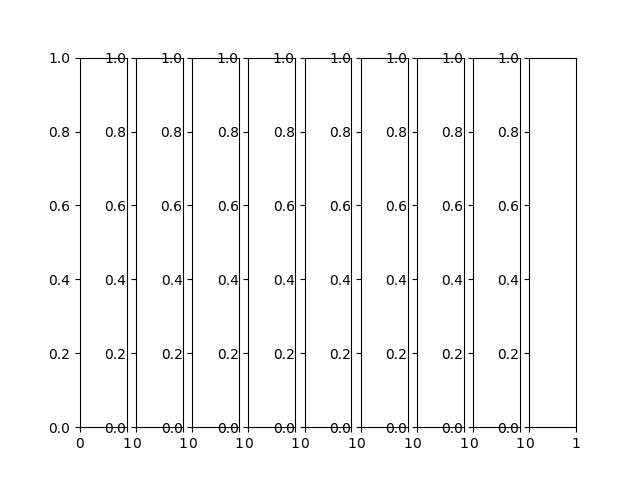

In [5]:
%matplotlib widget
import matplotlib.pyplot as plt
from utils.utils import visualize_depth

depth_minmax = [
                0.9 * scannet_data["near_fars"].min(),
                1.1 * scannet_data["near_fars"].max(),
            ]
# plt.figure()

#subplot(r,c) provide the no. of rows and columns
f, axarr = plt.subplots(1,scannet_data["depths_h"].shape[0]) 

# use the created array to output your multiple images. In this case I have stacked 4 images vertically
for i in range(scannet_data["depths_h"].shape[0]):
    novel_view_depth_color = visualize_depth(scannet_data["depths_h"][0], depth_minmax)[0]
    depth_vis = novel_view_depth_color.permute(1,2,0).numpy()
    axarr[i].imshow(depth_vis)


# plt.imshow(depth_vis)

In [ ]:
import kornia
import torch
import numpy as np
from PIL import Image
from utils.utils import visualize_depth
import matplotlib.pyplot as plt

depth = Image.open("/home/timothy/Desktop/2023Spring/generalized_nerf/logs_klevr/klevr/0531_architecture_memory_corrected_5/evaluation_/00000000/target_depth_00.png")
# depth = plt.imread("/home/timothy/Desktop/2023Spring/generalized_nerf/logs_klevr/klevr/0531_architecture_memory_corrected_5/evaluation_/00000000/target_depth_00.png")
depth = torch.from_numpy(np.array(depth)).to(torch.uint8).to(torch.float32).permute(2,0,1)
print(np.asarray(depth_)[0,0])
print(depth[:,0,0])

print(depth.max())
print(depth.shape)
print(depth.dtype)
filtered_depth = kornia.filters.bilateral_blur(depth.unsqueeze(0), (5, 5), 1, (2, 2))
print(filtered_depth.max())
print(filtered_depth.shape)
print(filtered_depth.dtype)
# depth = visualize_depth(depth, [0.1, 17.])[0]
# filtered_depth = visualize_depth(filtered_depth, [0.1, 17.])[0]
depth = (depth.permute(1,2,0)*255).cpu().numpy().astype(np.uint8)
filtered_depth = (filtered_depth.squeeze(0).permute(1,2,0)*255).cpu().numpy().astype(np.uint8)
print(depth.shape)
print(filtered_depth.shape)
print(depth.max())
print(filtered_depth.max())
f, axarr = plt.subplots(1,2)
axarr[0].imshow(depth)
axarr[1].imshow(filtered_depth)


In [ ]:
x = torch.tensor([1,2,3,4,5,6,7,8,9,10])
print(x.shape)
print(x.unsqueeze(0).unsqueeze(0).shape)